In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

#📂 SECTION 1: DATA LOADING & INITIAL EXPLORATION

In [2]:
df = pd.read_csv("/content/synthetic_mental_health_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sleep_hours          2000 non-null   float64
 1   screen_time          2000 non-null   float64
 2   exercise_minutes     2000 non-null   float64
 3   daily_pending_tasks  2000 non-null   int64  
 4   interruptions        2000 non-null   int64  
 5   fatigue_level        2000 non-null   float64
 6   social_hours         2000 non-null   float64
 7   coffee_cups          2000 non-null   int64  
 8   diet_quality         2000 non-null   object 
 9   weather              2000 non-null   object 
 10  mood_score           2000 non-null   float64
 11  stress_level         2000 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 187.6+ KB


In [4]:
df.head()

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,diet_quality,weather,mood_score,stress_level
0,7.745071,3.649643,13.272466,1,5,4.179955,2.448854,1,average,snowy,9.171062,1.000000
1,6.792604,4.710963,1.785436,3,6,4.883679,1.330623,3,good,sunny,5.706491,3.558516
2,7.971533,3.415160,71.843325,4,10,4.207812,2.134120,0,poor,cloudy,10.000000,2.971450
3,9.284545,4.384077,14.596656,2,4,3.362592,1.857070,0,good,sunny,8.385038,1.000000
4,6.648770,1.212771,19.048010,3,5,6.229107,2.642980,1,poor,rainy,10.000000,1.639047


In [15]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,mood_score,stress_level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.067237,4.990009,19.868516,2.948500,5.131000,4.996769,2.001369,0.989500,7.741658,2.129647
std,1.481299,2.002973,20.071066,1.725206,2.278472,2.000430,0.959934,1.012869,2.023962,1.482866
min,2.138099,0.000000,0.004821,0.000000,0.000000,0.000000,0.000000,0.000000,1.493465,1.000000
25%,6.066007,3.581748,5.580022,2.000000,3.000000,3.647335,1.304384,0.000000,6.090860,1.000000
50%,7.067037,4.999893,13.289737,3.000000,5.000000,4.956565,1.996521,1.000000,7.846064,1.397094
75%,8.024466,6.331087,28.118005,4.000000,7.000000,6.320355,2.653096,2.000000,10.000000,2.932065
max,12.000000,12.852475,150.504069,10.000000,15.000000,10.000000,5.505871,6.000000,10.000000,9.684702


In [13]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [14]:
df[numerical_cols].corr()

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,mood_score,stress_level
sleep_hours,1.000000,-0.018253,-0.044957,-0.020266,0.020075,0.019656,-0.028364,-0.010743,0.160510,-0.299987
screen_time,-0.018253,1.000000,0.033443,0.000687,-0.000746,-0.044424,0.009172,-0.021468,-0.287830,-0.001215
exercise_minutes,-0.044957,0.033443,1.000000,-0.006550,0.013778,0.022317,0.018532,0.016574,0.702350,0.011245
daily_pending_tasks,-0.020266,0.000687,-0.006550,1.000000,0.008208,0.006637,0.026906,-0.021208,-0.008746,0.798292
interruptions,0.020075,-0.000746,0.013778,0.008208,1.000000,-0.014940,0.001267,-0.008508,0.012302,0.284151
fatigue_level,0.019656,-0.044424,0.022317,0.006637,-0.014940,1.000000,0.029126,0.026313,-0.096589,0.077554
social_hours,-0.028364,0.009172,0.018532,0.026906,0.001267,0.029126,1.000000,-0.002541,0.028679,0.013869
coffee_cups,-0.010743,-0.021468,0.016574,-0.021208,-0.008508,0.026313,-0.002541,1.000000,0.010891,0.063265
mood_score,0.160510,-0.287830,0.702350,-0.008746,0.012302,-0.096589,0.028679,0.010891,1.000000,-0.065135
stress_level,-0.299987,-0.001215,0.011245,0.798292,0.284151,0.077554,0.013869,0.063265,-0.065135,1.000000


In [16]:
outlier_summary = []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outlier_pct = (outliers / len(df)) * 100
    outlier_summary.append({
        'Feature': col,
        'Outliers': outliers,
        'Percentage': f"{outlier_pct:.2f}%"
    })

In [17]:
outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

            Feature  Outliers Percentage
        sleep_hours        17      0.85%
        screen_time         8      0.40%
   exercise_minutes        95      4.75%
daily_pending_tasks        24      1.20%
      interruptions         3      0.15%
      fatigue_level         0      0.00%
       social_hours         8      0.40%
        coffee_cups         2      0.10%
         mood_score         0      0.00%
       stress_level        51      2.55%


In [18]:
df_engineered = df.copy()

#📂 SECTION 2: FEATURE ENGINEERING

In [19]:
df_engineered['sleep_category'] = pd.cut(
    df_engineered['sleep_hours'],
    bins=[0, 5, 7, 9, 15],
    labels=['Poor', 'Moderate', 'Good', 'Excessive']
)

In [20]:
df_engineered['screen_time_category'] = pd.cut(
    df_engineered['screen_time'],
    bins=[0, 3, 6, 9, 15],
    labels=['Low', 'Moderate', 'High', 'Very High']
)

In [21]:
df_engineered['exercise_level'] = pd.cut(
    df_engineered['exercise_minutes'],
    bins=[0, 20, 40, 80, 200],
    labels=['Sedentary', 'Light', 'Moderate', 'Active']
)

In [22]:
df_engineered['stress_category'] = pd.cut(
    df_engineered['stress_level'],
    bins=[0, 2, 4, 7, 10],
    labels=['Low', 'Moderate', 'High', 'Very High']
)

In [23]:
df_engineered['social_engagement'] = df_engineered['social_hours'] * df_engineered['coffee_cups']

In [24]:
df_engineered['wellness_score'] = (
    (df_engineered['sleep_hours'] / 12) * 0.25 +
    (df_engineered['exercise_minutes'] / 150) * 0.25 +
    (df_engineered['social_hours'] / 10) * 0.15 +
    (1 - df_engineered['stress_level'] / 10) * 0.20 +
    (1 - df_engineered['screen_time'] / 13) * 0.15
) * 100

In [25]:
df_engineered['mood_positive'] = (
    df_engineered['mood_score'] >= df_engineered['mood_score'].median()
).astype(int)

In [26]:
df_engineered['sleep_exercise_ratio'] = df_engineered['sleep_hours'] / (df_engineered['exercise_minutes'] + 1)
df_engineered['work_stress_load'] = df_engineered['daily_pending_tasks'] * df_engineered['stress_level']

In [27]:
df_engineered['task_category'] = pd.cut(
    df_engineered['daily_pending_tasks'],
    bins=[0, 2, 4, 6, 11],
    labels=['Low', 'Medium', 'High', 'Very High']
)

#📂 SECTION 3: DATA VISUALIZATION

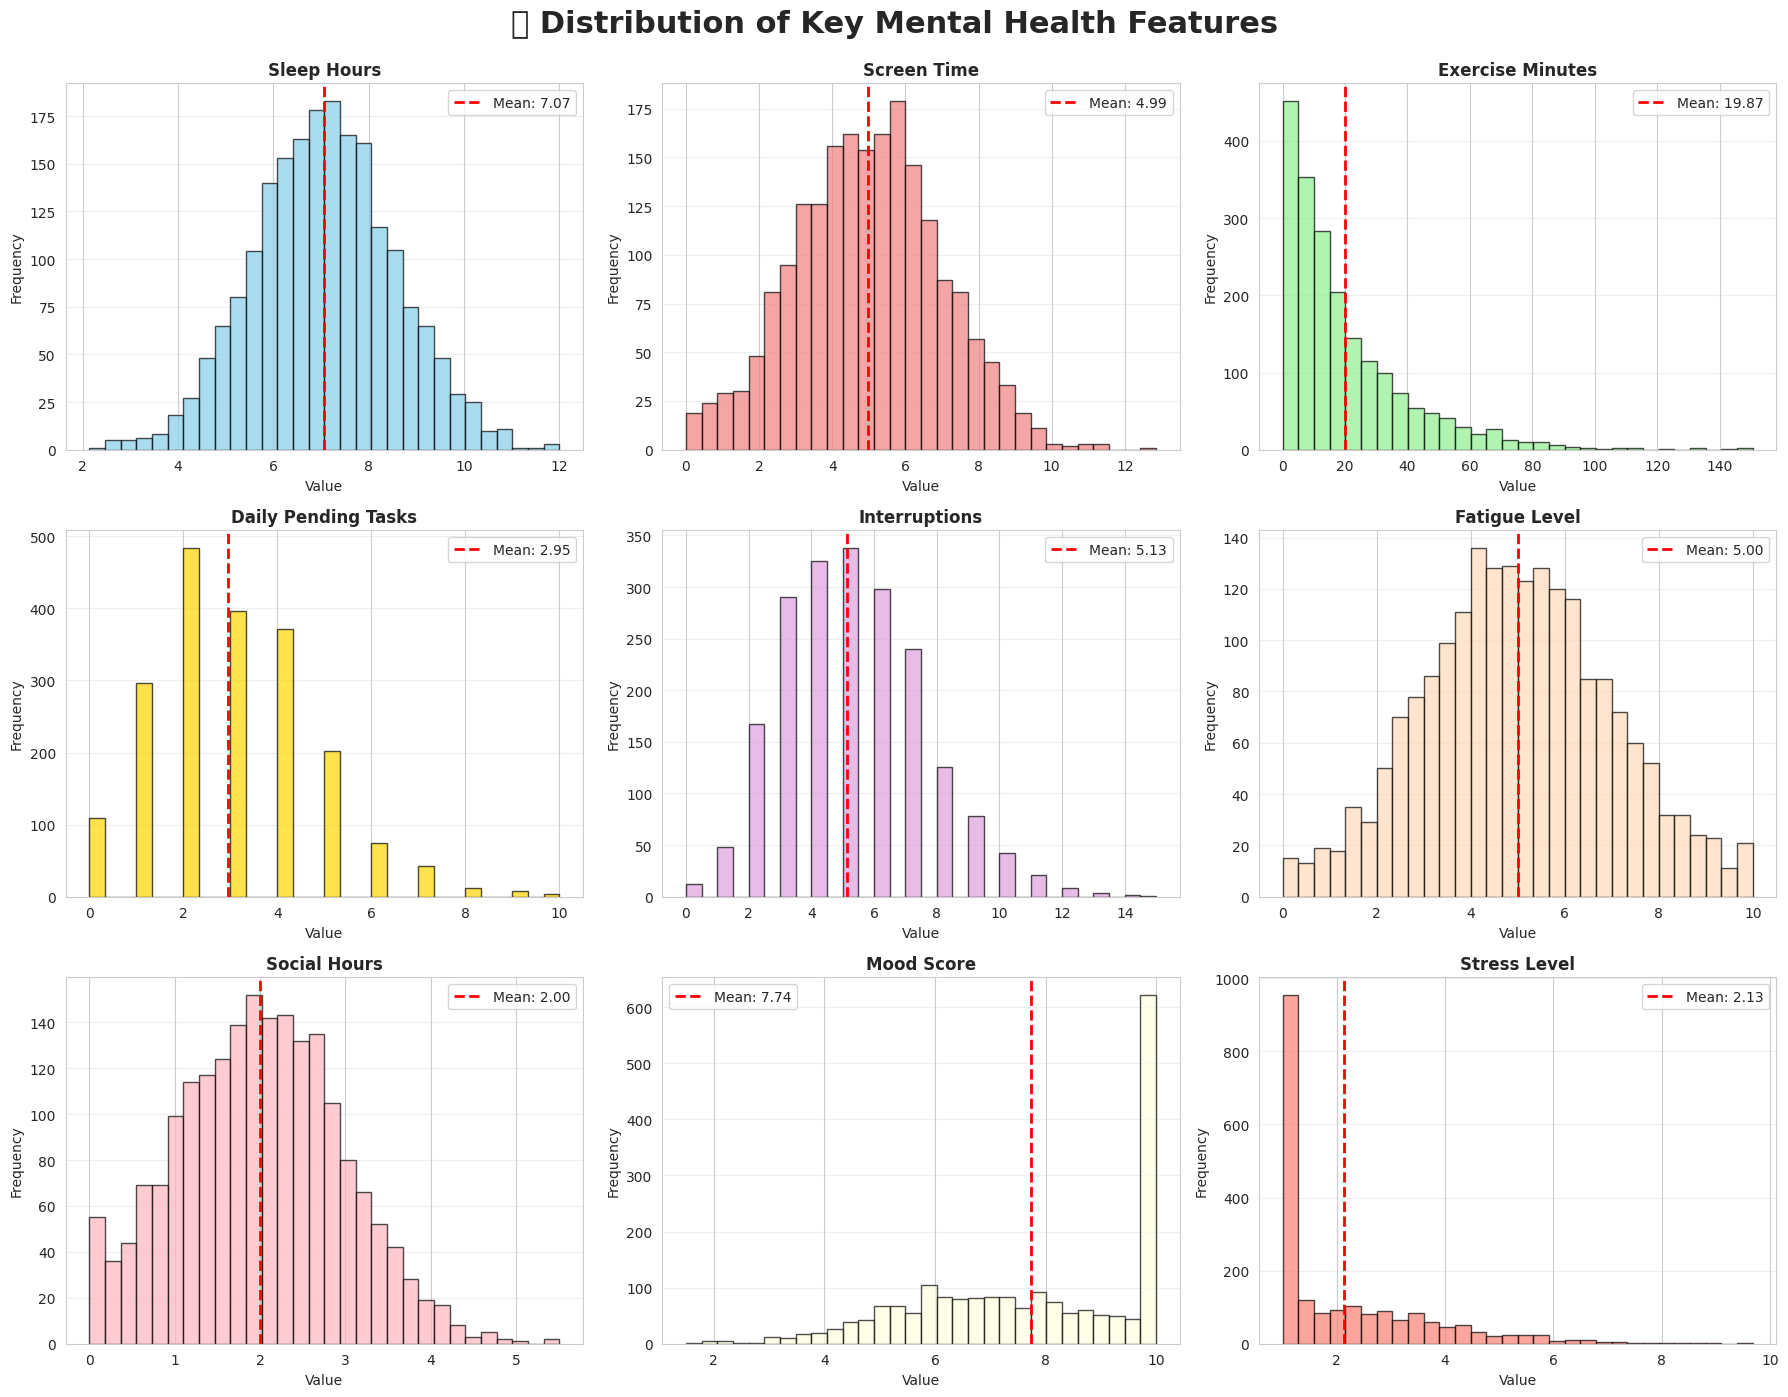

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('📊 Distribution of Key Mental Health Features',
             fontsize=22, fontweight='bold', y=0.995)

key_features = ['sleep_hours', 'screen_time', 'exercise_minutes',
                'daily_pending_tasks', 'interruptions', 'fatigue_level',
                'social_hours', 'mood_score', 'stress_level']

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum',
          'peachpuff', 'lightpink', 'lightyellow', 'salmon']

for idx, (col, color) in enumerate(zip(key_features, colors)):
    row = idx // 3
    col_idx = idx % 3

    axes[row, col_idx].hist(df_engineered[col], bins=30, edgecolor='black',
                           alpha=0.7, color=color)
    axes[row, col_idx].set_title(f'{col.replace("_", " ").title()}',
                                fontweight='bold', fontsize=12)
    axes[row, col_idx].set_xlabel('Value', fontsize=10)
    axes[row, col_idx].set_ylabel('Frequency', fontsize=10)
    axes[row, col_idx].grid(axis='y', alpha=0.3)

    # Add mean line
    mean_val = df_engineered[col].mean()
    axes[row, col_idx].axvline(mean_val, color='red', linestyle='--',
                              linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.show()


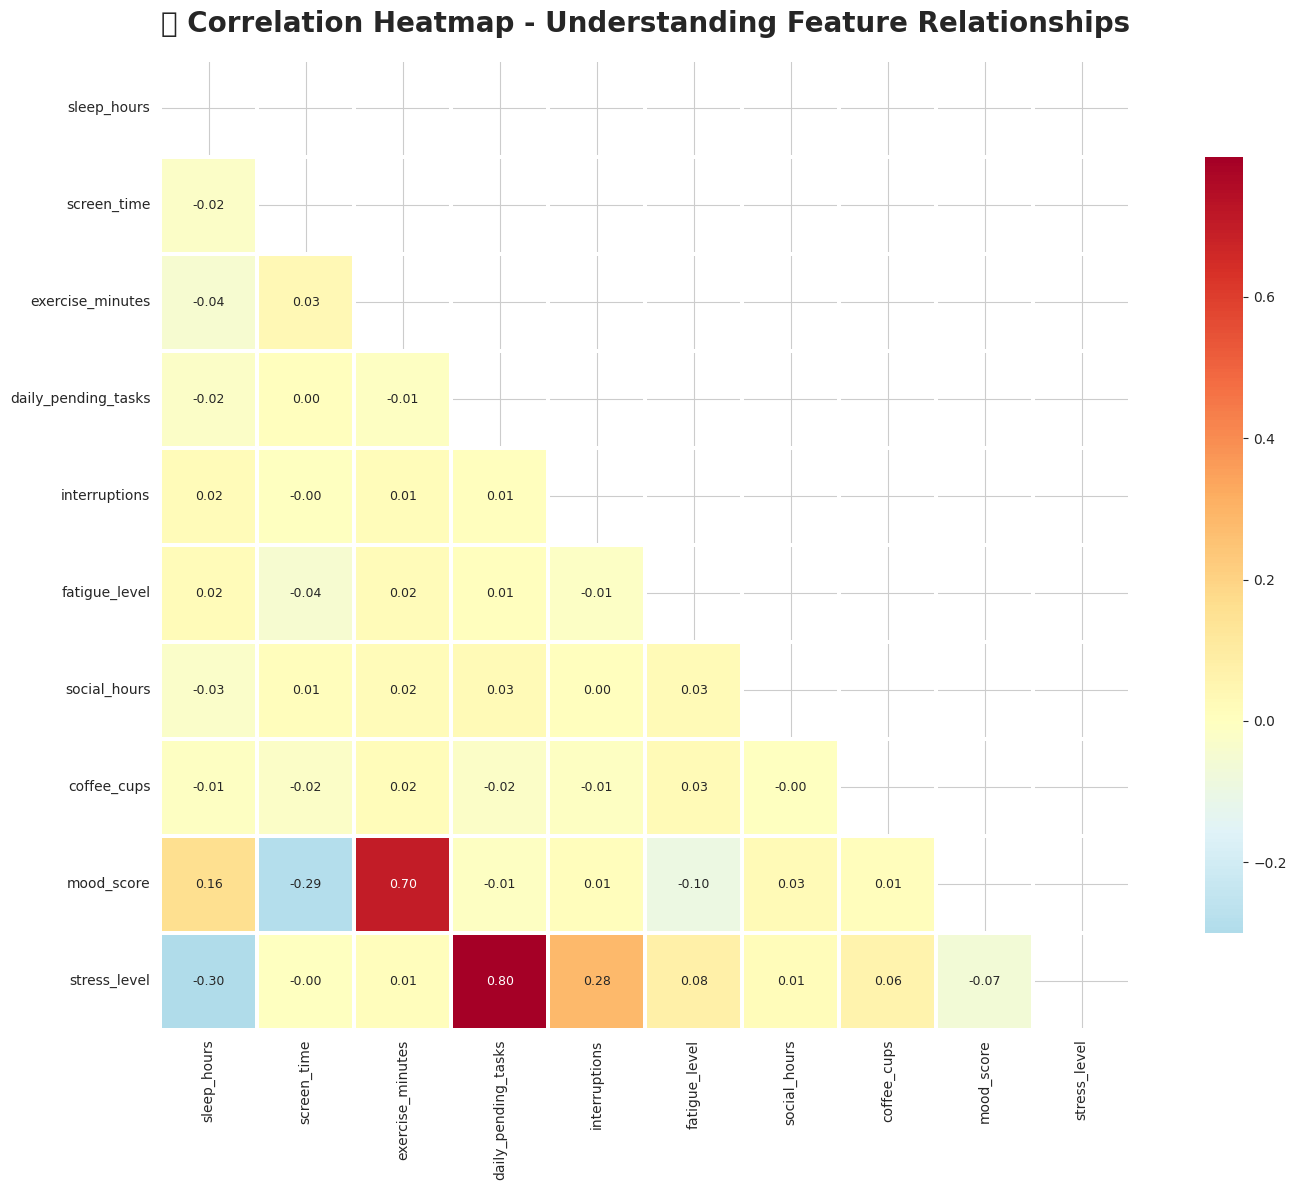

In [29]:
plt.figure(figsize=(16, 12))
correlation_matrix = df_engineered[numerical_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='RdYlBu_r', center=0, square=True, linewidths=1.5,
            cbar_kws={"shrink": 0.8}, annot_kws={"size": 9})

plt.title('🔥 Correlation Heatmap - Understanding Feature Relationships',
          fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

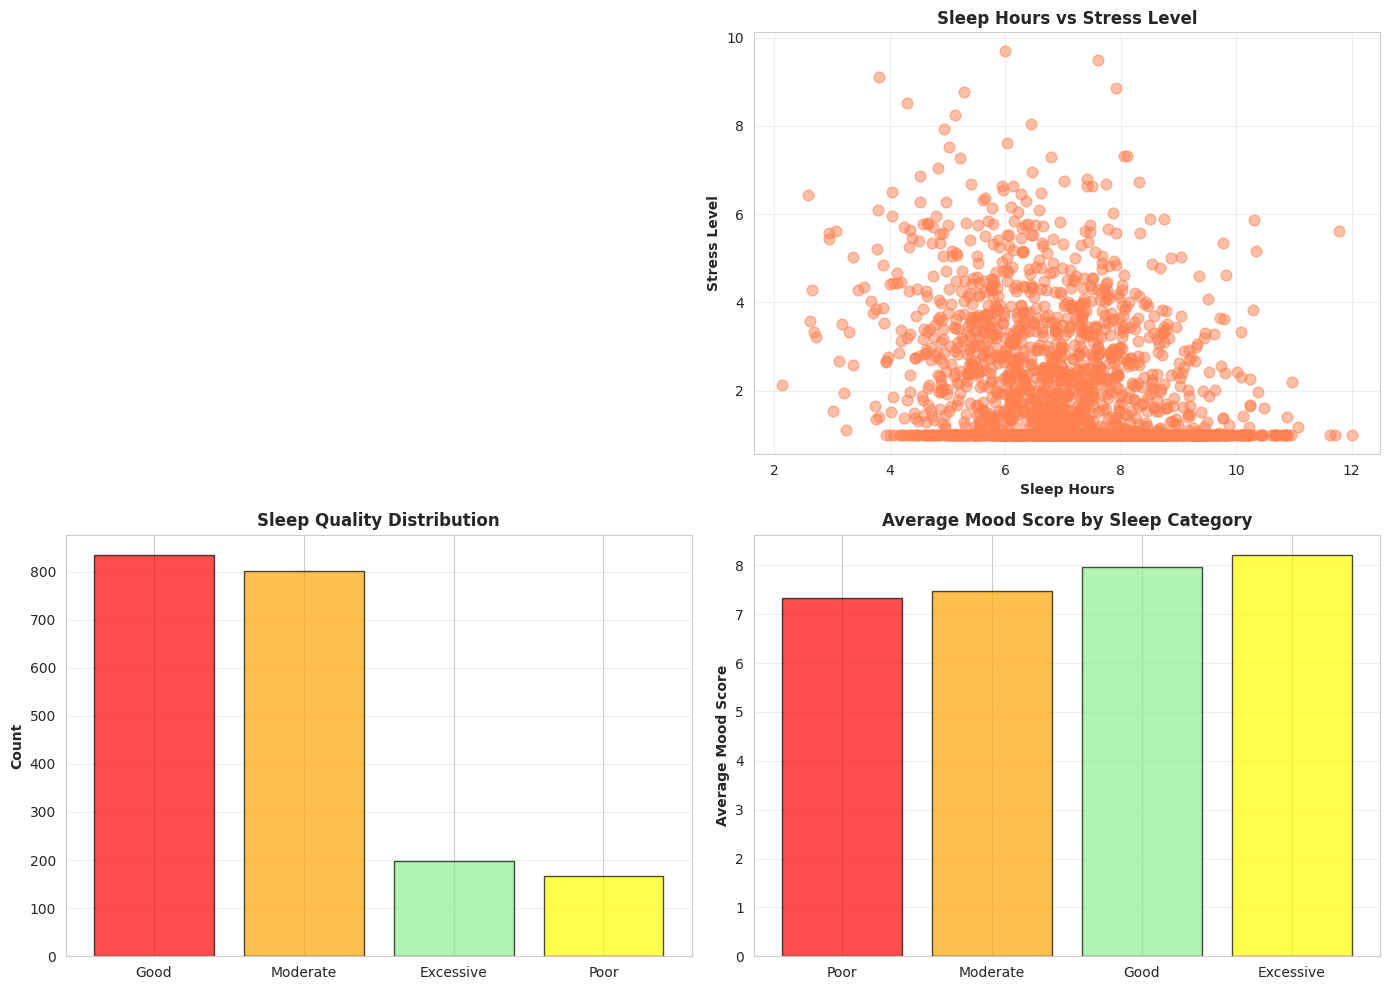

In [34]:
import matplotlib.pyplot as plt

# Create proper 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 1].scatter(
    df_engineered['sleep_hours'],
    df_engineered['stress_level'],
    alpha=0.5,
    color='coral',
    s=60
)
axes[0, 1].set_xlabel('Sleep Hours', fontweight='bold')
axes[0, 1].set_ylabel('Stress Level', fontweight='bold')
axes[0, 1].set_title('Sleep Hours vs Stress Level', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

sleep_dist = df_engineered['sleep_category'].value_counts()

colors1 = ['red', 'orange', 'lightgreen', 'yellow'][:len(sleep_dist)]

axes[1, 0].bar(
    sleep_dist.index,
    sleep_dist.values,
    color=colors1,
    alpha=0.7,
    edgecolor='black'
)
axes[1, 0].set_title('Sleep Quality Distribution', fontweight='bold')
axes[1, 0].set_ylabel('Count', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)


mood_by_sleep = df_engineered.groupby('sleep_category')['mood_score'].mean()

colors2 = ['red', 'orange', 'lightgreen', 'yellow'][:len(mood_by_sleep)]

axes[1, 1].bar(
    mood_by_sleep.index,
    mood_by_sleep.values,
    color=colors2,
    alpha=0.7,
    edgecolor='black'
)
axes[1, 1].set_title('Average Mood Score by Sleep Category', fontweight='bold')
axes[1, 1].set_ylabel('Average Mood Score', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

axes[0, 0].axis('off')

# Final layout
plt.tight_layout()
plt.show()


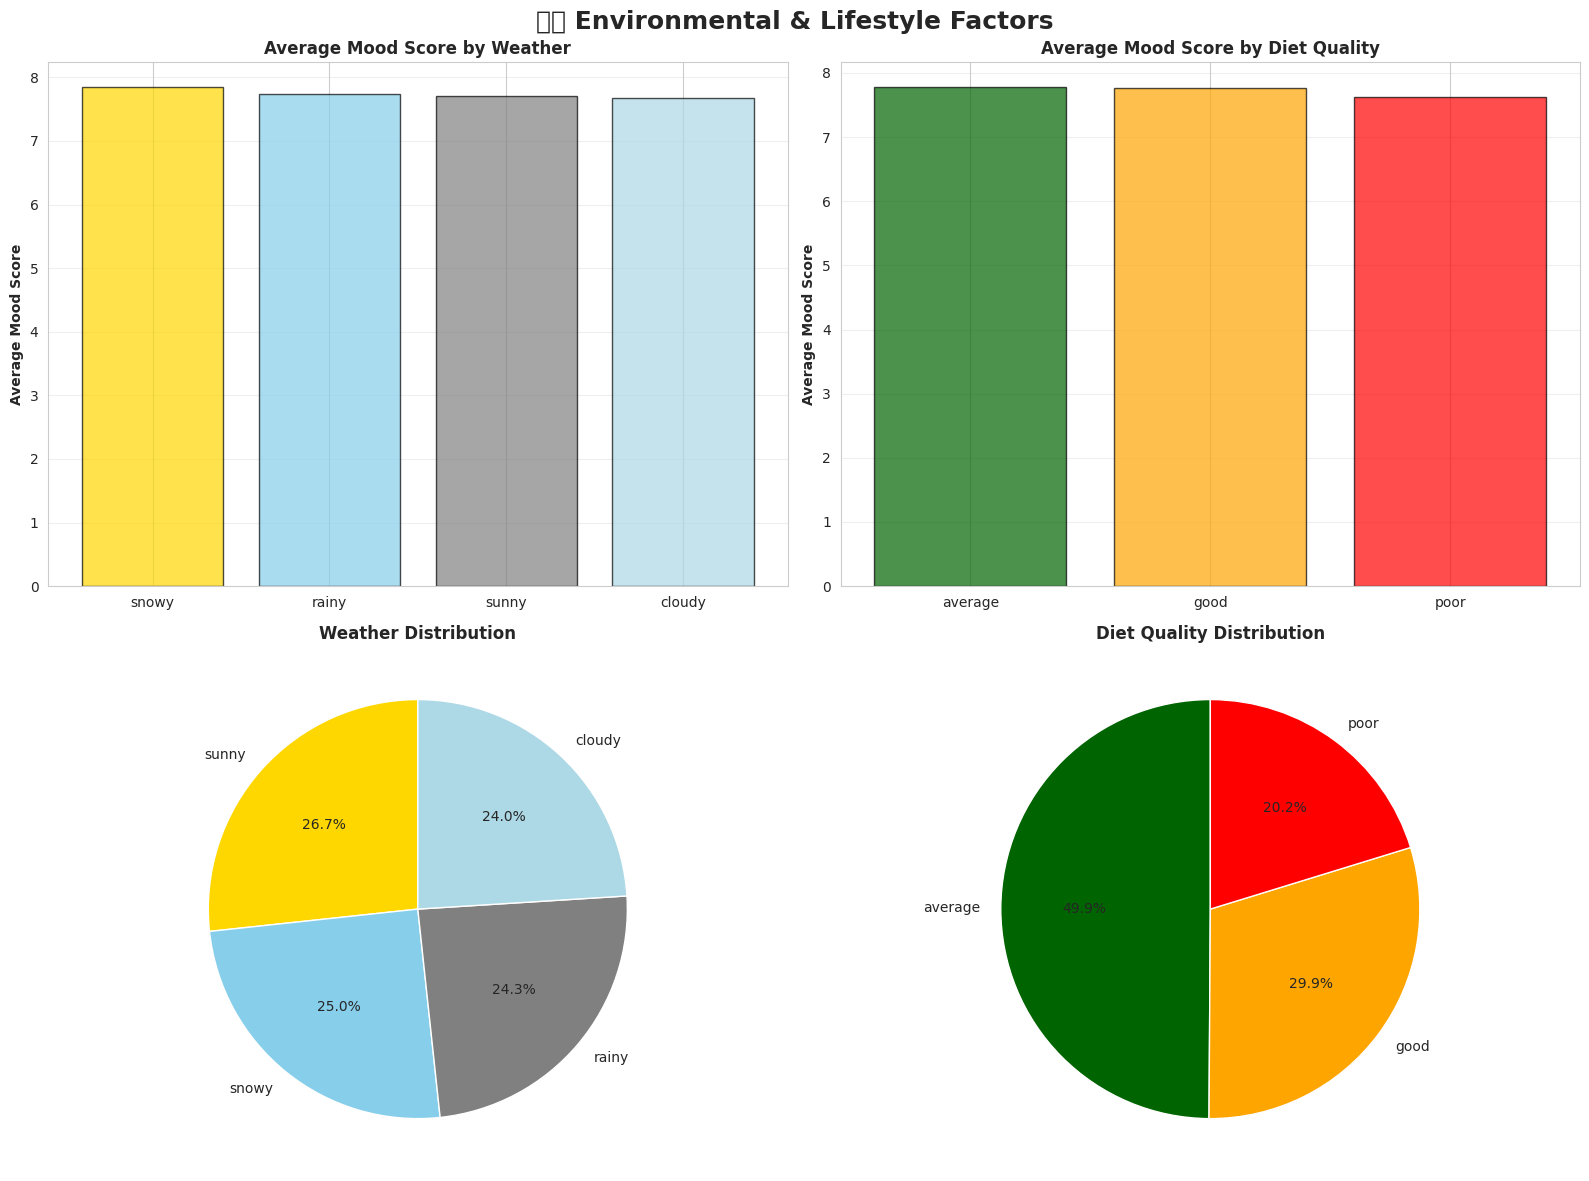

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🌤️🍎 Environmental & Lifestyle Factors',
             fontsize=18, fontweight='bold')

# Weather impact on mood
weather_mood = df_engineered.groupby('weather')['mood_score'].mean().sort_values(ascending=False)
axes[0, 0].bar(weather_mood.index, weather_mood.values,
              color=['gold', 'skyblue', 'gray', 'lightblue'], alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Average Mood Score by Weather', fontweight='bold')
axes[0, 0].set_ylabel('Average Mood Score', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Diet quality impact on mood
diet_mood = df_engineered.groupby('diet_quality')['mood_score'].mean().sort_values(ascending=False)
axes[0, 1].bar(diet_mood.index, diet_mood.values,
              color=['darkgreen', 'orange', 'red'], alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Average Mood Score by Diet Quality', fontweight='bold')
axes[0, 1].set_ylabel('Average Mood Score', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Weather distribution
weather_dist = df_engineered['weather'].value_counts()
axes[1, 0].pie(weather_dist.values, labels=weather_dist.index, autopct='%1.1f%%',
              colors=['gold', 'skyblue', 'gray', 'lightblue'], startangle=90)
axes[1, 0].set_title('Weather Distribution', fontweight='bold')

# Diet quality distribution
diet_dist = df_engineered['diet_quality'].value_counts()
axes[1, 1].pie(diet_dist.values, labels=diet_dist.index, autopct='%1.1f%%',
              colors=['darkgreen', 'orange', 'red'], startangle=90)
axes[1, 1].set_title('Diet Quality Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

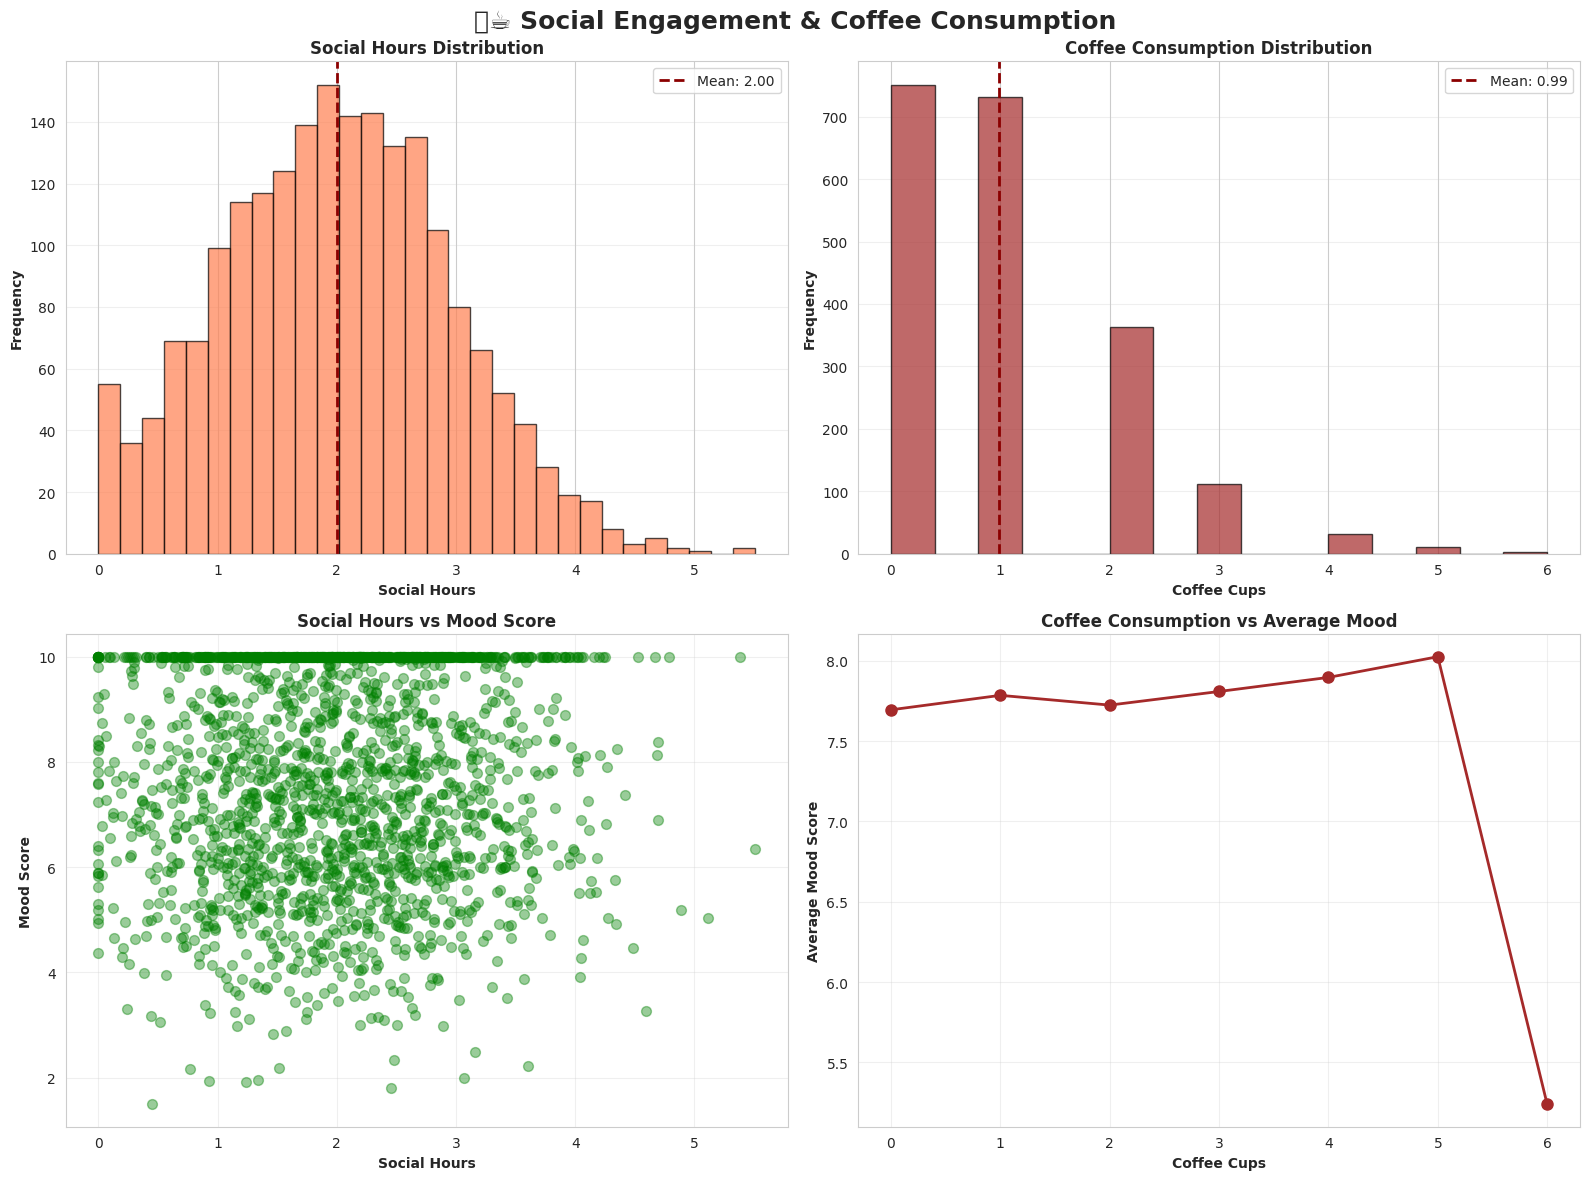

In [37]:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('👥☕ Social Engagement & Coffee Consumption',
             fontsize=18, fontweight='bold')

# Social hours distribution
axes[0, 0].hist(df_engineered['social_hours'], bins=30, color='coral',
               alpha=0.7, edgecolor='black')
mean_social = df_engineered['social_hours'].mean()
axes[0, 0].axvline(mean_social, color='darkred', linestyle='--', linewidth=2,
                  label=f'Mean: {mean_social:.2f}')
axes[0, 0].set_title('Social Hours Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Social Hours', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Coffee consumption distribution
axes[0, 1].hist(df_engineered['coffee_cups'], bins=15, color='brown',
               alpha=0.7, edgecolor='black')
mean_coffee = df_engineered['coffee_cups'].mean()
axes[0, 1].axvline(mean_coffee, color='darkred', linestyle='--', linewidth=2,
                  label=f'Mean: {mean_coffee:.2f}')
axes[0, 1].set_title('Coffee Consumption Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Coffee Cups', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Social hours vs mood
axes[1, 0].scatter(df_engineered['social_hours'], df_engineered['mood_score'],
                  alpha=0.4, color='green', s=50)
axes[1, 0].set_xlabel('Social Hours', fontweight='bold')
axes[1, 0].set_ylabel('Mood Score', fontweight='bold')
axes[1, 0].set_title('Social Hours vs Mood Score', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Coffee vs mood
coffee_mood = df_engineered.groupby('coffee_cups')['mood_score'].mean()
axes[1, 1].plot(coffee_mood.index, coffee_mood.values, marker='o', linewidth=2,
               markersize=8, color='brown')
axes[1, 1].set_xlabel('Coffee Cups', fontweight='bold')
axes[1, 1].set_ylabel('Average Mood Score', fontweight='bold')
axes[1, 1].set_title('Coffee Consumption vs Average Mood', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

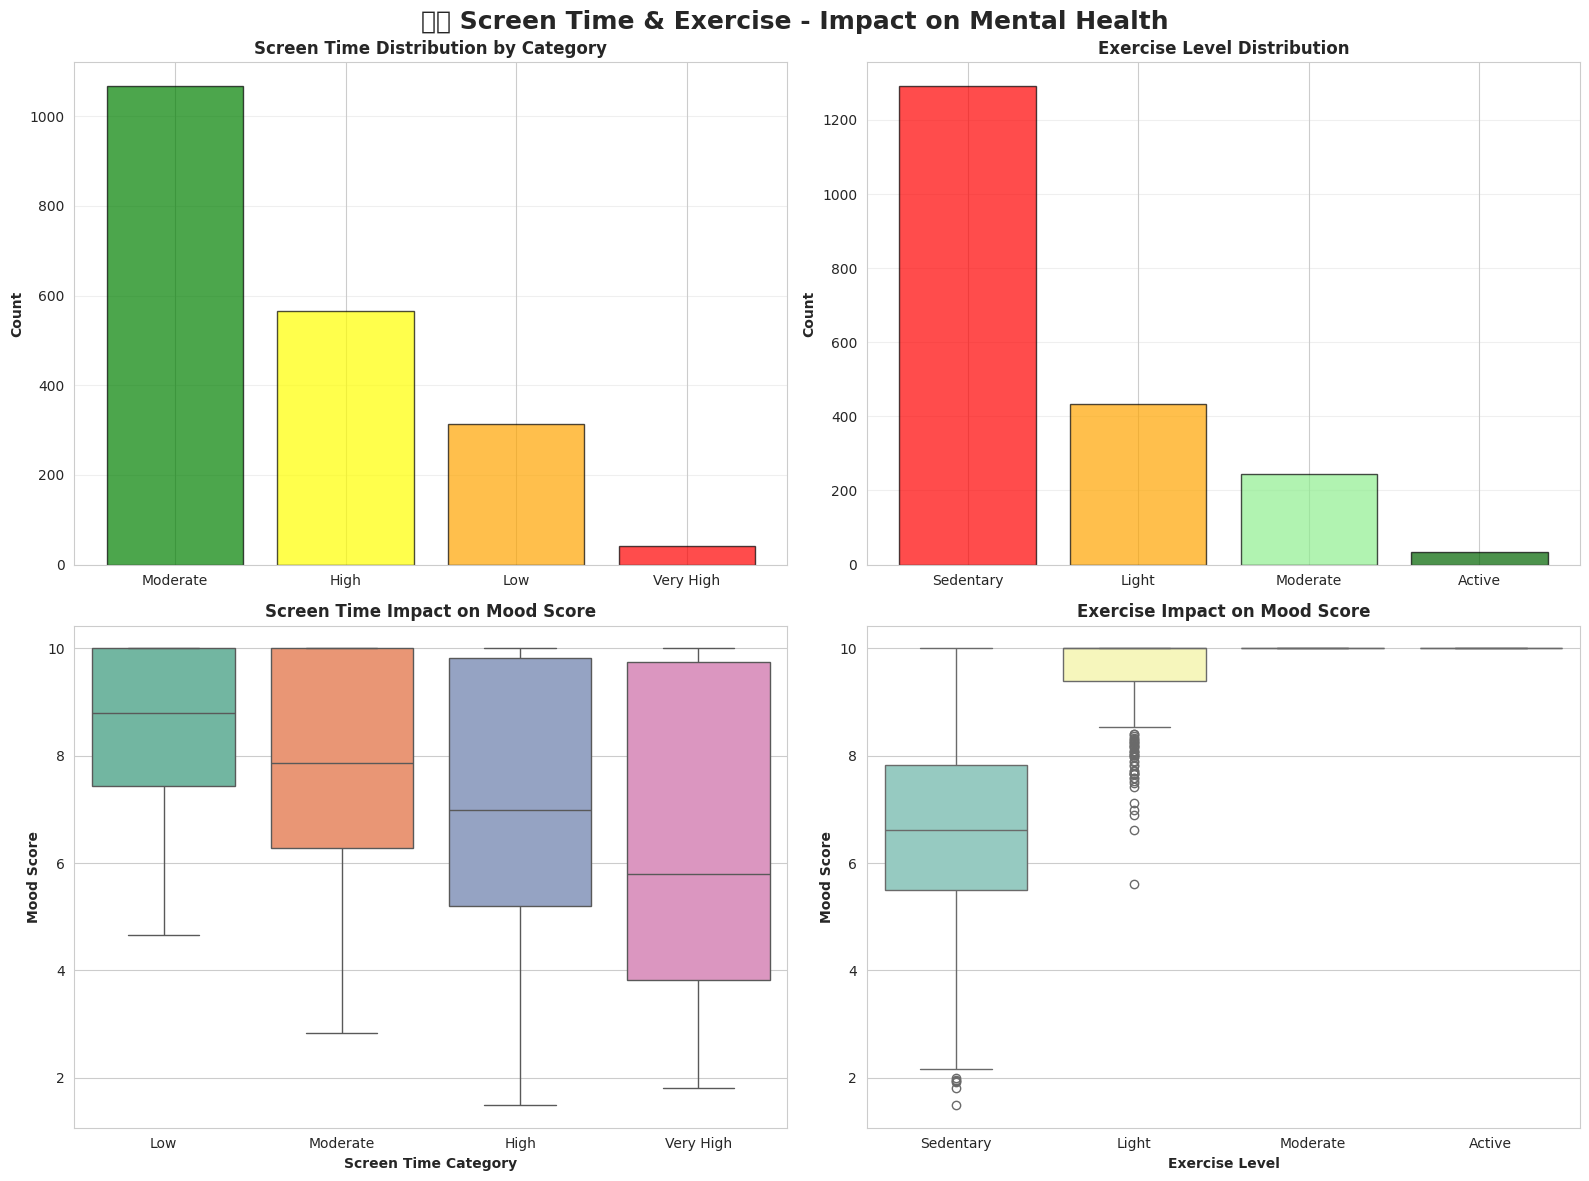

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📱🏃 Screen Time & Exercise - Impact on Mental Health',
             fontsize=18, fontweight='bold')

# Screen time distribution
screen_counts = df_engineered['screen_time_category'].value_counts()
axes[0, 0].bar(screen_counts.index, screen_counts.values,
              color=['green', 'yellow', 'orange', 'red'], alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Screen Time Distribution by Category', fontweight='bold')
axes[0, 0].set_ylabel('Count', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Exercise level distribution
exercise_counts = df_engineered['exercise_level'].value_counts()
axes[0, 1].bar(exercise_counts.index, exercise_counts.values,
              color=['red', 'orange', 'lightgreen', 'darkgreen'], alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Exercise Level Distribution', fontweight='bold')
axes[0, 1].set_ylabel('Count', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Screen time impact on mood
sns.boxplot(data=df_engineered, x='screen_time_category', y='mood_score',
           ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Screen Time Impact on Mood Score', fontweight='bold')
axes[1, 0].set_xlabel('Screen Time Category', fontweight='bold')
axes[1, 0].set_ylabel('Mood Score', fontweight='bold')

# Exercise impact on mood
sns.boxplot(data=df_engineered, x='exercise_level', y='mood_score',
           ax=axes[1, 1], palette='Set3')
axes[1, 1].set_title('Exercise Impact on Mood Score', fontweight='bold')
axes[1, 1].set_xlabel('Exercise Level', fontweight='bold')
axes[1, 1].set_ylabel('Mood Score', fontweight='bold')

plt.tight_layout()
plt.show()

#📂 SECTION 4: MODEL CREATION

In [40]:
features = [
    'sleep_hours', 'screen_time', 'exercise_minutes',
    'daily_pending_tasks', 'interruptions', 'fatigue_level',
    'social_hours', 'stress_level', 'coffee_cups',
    'sleep_exercise_ratio', 'work_stress_load',
    'wellness_score', 'social_engagement'
]

In [41]:
X = df_engineered[features]
y = df_engineered['mood_positive']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [43]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

log_preds = log_model.predict(X_test_scaled)

print("LOGISTIC REGRESSION")
print("Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds))


LOGISTIC REGRESSION
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       250
           1       0.93      0.91      0.92       250

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [45]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("RANDOM FOREST")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


RANDOM FOREST
Accuracy: 0.912
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       250
           1       0.93      0.90      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



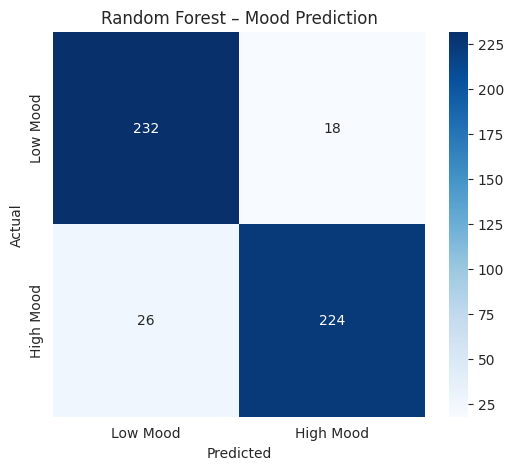

In [46]:
cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Mood','High Mood'],
            yticklabels=['Low Mood','High Mood'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest – Mood Prediction")
plt.show()

#🔍 Final Insights & Model Results

This project explored how daily habits influence mental well-being using data science and machine learning.

After performing extensive feature engineering, visualization, and correlation analysis, two classification models were trained to predict whether a person is in a positive or negative mental state.

Model	Accuracy
Logistic Regression	92%
Random Forest	91.2%

Despite being simpler, Logistic Regression slightly outperformed Random Forest, showing that mental health patterns in this dataset are largely linear and well-structured.